In [14]:
import pandas_datareader.data as web
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

# read data
c = ['GDPC1', 'M1SL', 'FEDFUNDS', 'CPILFESL']
orig_data = web.DataReader(c, 'fred',start = datetime.datetime(1959,7,1),end = datetime.datetime(1996,3,1))
data_mp = orig_data.copy()
data_mp

,GDPC1,M1SL,FEDFUNDS,CPILFESL
DATE,,,,
1959-07-01,3194.653,141.7,3.47,30.2
1959-08-01,NaN,141.9,3.50,30.2
1959-09-01,NaN,141.0,3.76,30.3
1959-10-01,3203.759,140.5,3.98,30.4
1959-11-01,NaN,140.4,4.00,30.4
...,...,...,...,...
1995-11-01,NaN,1134.1,5.80,163.0
1995-12-01,NaN,1127.5,5.60,163.1
1996-01-01,10817.896,1123.5,5.56,163.7


,GDPC1,M1SL,FEDFUNDS,CPILFESL
DATE,,,,
1959-07-01,3194.653,141.7,3.47,30.2
1959-08-01,NaN,141.9,3.50,30.2
1959-09-01,NaN,141.0,3.76,30.3
1959-10-01,3203.759,140.5,3.98,30.4
1959-11-01,NaN,140.4,4.00,30.4
...,...,...,...,...
1995-11-01,NaN,1134.1,5.80,163.0
1995-12-01,NaN,1127.5,5.60,163.1
1996-01-01,10817.896,1123.5,5.56,163.7


In [15]:
# plot data function
def plot_data(data_b, data_r, label, title, ylim=None):
    # plot
    if data_b is not None:
        plt.plot(data_b.index, data_b, label=label[0], color="blue")
    if data_r is not None:
        plt.plot(data_r.index, data_r, label=label[1], color="darkorange")

    # title
    plt.title(title)
    
    #lim
    if ylim is not None:
        plt.ylim(ylim[0], ylim[1])
    
    #setting
    plt.xticks(rotation=90, size='small')
    
    # display
    plt.legend()

    # show
    plt.show()

In [16]:
# plot data into quadrants
def plot_quadrants():
    plt.style.use('default')
    sns.set()
    sns.set_style('whitegrid')
    sns.set_palette('gray')

    fig = plt.figure()
    
    for i in range(0, 4):
        # top left
        axi = fig.add_subplot(2, 2, 1)
        ax4.plot(x4, y4)
        ax1.set_xlabel("weight [g]")
        ax1.set_ylabel("length [cm]")


In [17]:
# (a) Moving average

lag_len = 6
columns = ['M1SL', 'FEDFUNDS', 'CPILFESL']

data_mp["GDPC1_ADJ"] = data_mp['GDPC1'].resample('QS', label='left').sum().rolling(window=4, min_periods=1, center=True).mean()

for c in columns:
    data_mp[c+'_ADJ'] = data_mp[c].rolling(window=12, min_periods=1, center=True).mean()
    
data_mp

,GDPC1,M1SL,FEDFUNDS,CPILFESL,GDPC1_ADJ,M1SL_ADJ,FEDFUNDS_ADJ,CPILFESL_ADJ
DATE,,,,,,,,
1959-07-01,3194.653,141.7,3.47,30.2,3199.206000,140.900000,3.783333,30.333333
1959-08-01,NaN,141.9,3.50,30.2,NaN,140.771429,3.812857,30.357143
1959-09-01,NaN,141.0,3.76,30.3,NaN,140.662500,3.832500,30.387500
1959-10-01,3203.759,140.5,3.98,30.4,3224.723000,140.566667,3.833333,30.411111
1959-11-01,NaN,140.4,4.00,30.4,NaN,140.470000,3.842000,30.430000
...,...,...,...,...,...,...,...,...
1995-11-01,NaN,1134.1,5.80,163.0,NaN,1135.081818,5.695455,162.554545
1995-12-01,NaN,1127.5,5.60,163.1,NaN,1134.060000,5.664000,162.740000
1996-01-01,10817.896,1123.5,5.56,163.7,10740.144667,1132.933333,5.626667,162.922222


,GDPC1,M1SL,FEDFUNDS,CPILFESL,GDPC1_ADJ,M1SL_ADJ,FEDFUNDS_ADJ,CPILFESL_ADJ
DATE,,,,,,,,
1959-07-01,3194.653,141.7,3.47,30.2,3199.206000,140.900000,3.783333,30.333333
1959-08-01,NaN,141.9,3.50,30.2,NaN,140.771429,3.812857,30.357143
1959-09-01,NaN,141.0,3.76,30.3,NaN,140.662500,3.832500,30.387500
1959-10-01,3203.759,140.5,3.98,30.4,3224.723000,140.566667,3.833333,30.411111
1959-11-01,NaN,140.4,4.00,30.4,NaN,140.470000,3.842000,30.430000
...,...,...,...,...,...,...,...,...
1995-11-01,NaN,1134.1,5.80,163.0,NaN,1135.081818,5.695455,162.554545
1995-12-01,NaN,1127.5,5.60,163.1,NaN,1134.060000,5.664000,162.740000
1996-01-01,10817.896,1123.5,5.56,163.7,10740.144667,1132.933333,5.626667,162.922222


In [18]:
# split data

y1_orig, y1_ajus = data_mp["GDPC1"].resample('QS').sum(), data_mp["GDPC1_ADJ"].resample('QS').sum() # GDP quarterly
y2_orig, y2_ajus = data_mp["M1SL"], data_mp["M1SL_ADJ"]
y3_orig = data_mp["FEDFUNDS"] #  No need for seasonal adjusted
y4_orig, y4_ajus = data_mp["CPILFESL"], data_mp["CPILFESL_ADJ"]

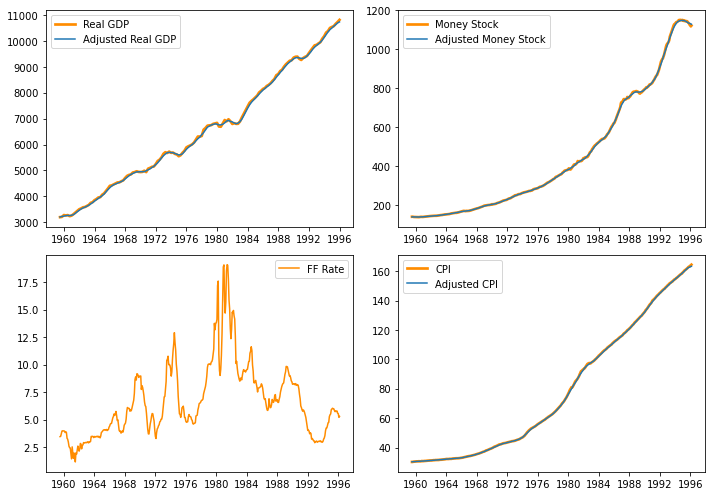

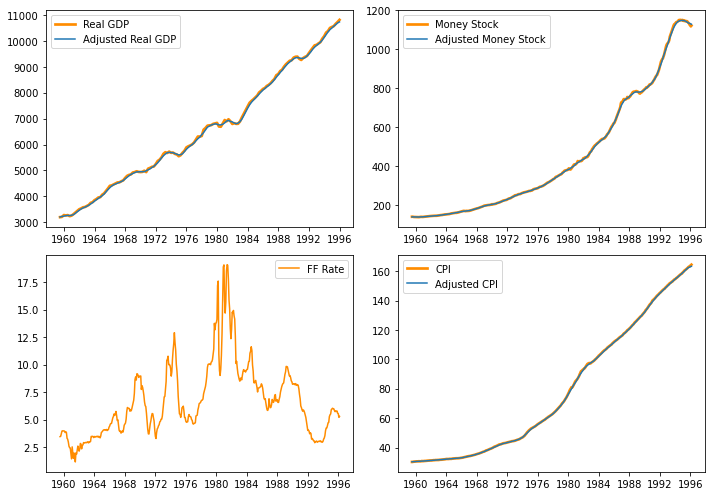

In [19]:
import itertools

# plot original series and seasonally ajusted series

fig, ax = plt.subplots(2, 2, figsize=(10,7))

ax[0, 0].plot(y1_orig.index, y1_orig, label='Real GDP', linewidth = 2.7, color="darkorange")
ax[0, 0].plot(y1_ajus.index, y1_ajus, label='Adjusted Real GDP')
ax[0, 1].plot(y2_orig.index, y2_orig, label='Money Stock', linewidth = 2.7, color="darkorange")
ax[0, 1].plot(y2_ajus.index, y2_ajus, label='Adjusted Money Stock')
ax[1, 0].plot(y3_orig.index, y3_orig, label='FF Rate',color="darkorange")
ax[1, 1].plot(y4_orig.index, y4_orig, label='CPI', linewidth = 2.7, color="darkorange")
ax[1, 1].plot(y4_ajus.index, y4_ajus, label='Adjusted CPI')

for e in itertools.product([0,1], [0,1]):
    ax[e[0], e[1]].legend()

fig.tight_layout()
plt.show()

In [20]:
# (b)linear interporation

data_mp['GDPC1_ADJ'].interpolate(method='linear',inplace=True)
data_mp['GDPC1_ADJ']

DATE
1959-07-01     3199.206000
1959-08-01     3207.711667
1959-09-01     3216.217333
1959-10-01     3224.723000
1959-11-01     3227.503417
                  ...     
1995-11-01    10712.637222
1995-12-01    10726.390944
1996-01-01    10740.144667
1996-02-01    10740.144667
1996-03-01    10740.144667
Freq: MS, Name: GDPC1_ADJ, Length: 441, dtype: float64

DATE
1959-07-01     3199.206000
1959-08-01     3207.711667
1959-09-01     3216.217333
1959-10-01     3224.723000
1959-11-01     3227.503417
                  ...     
1995-11-01    10712.637222
1995-12-01    10726.390944
1996-01-01    10740.144667
1996-02-01    10740.144667
1996-03-01    10740.144667
Freq: MS, Name: GDPC1_ADJ, Length: 441, dtype: float64

In [21]:
# (c)log transformation
data_mp['GDPC1_ADJ'] = np.log(data_mp['GDPC1_ADJ'])
data_mp['M1SL_ADJ'] = np.log(data_mp['M1SL_ADJ'])
data_mp['CPILFESL_ADJ'] = np.log(data_mp['CPILFESL_ADJ'])

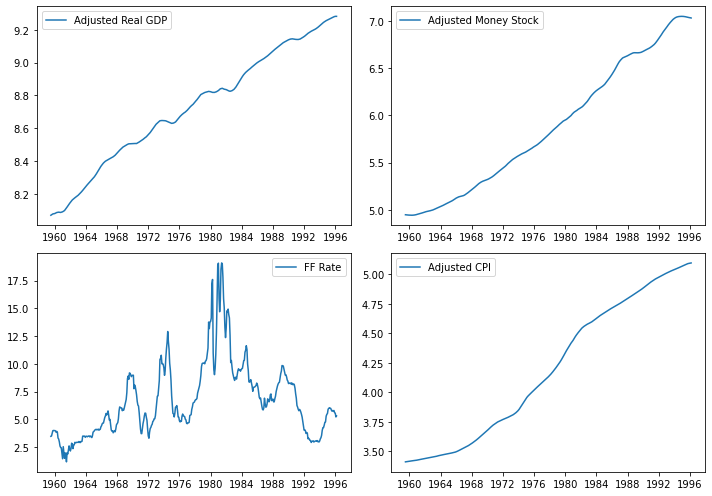

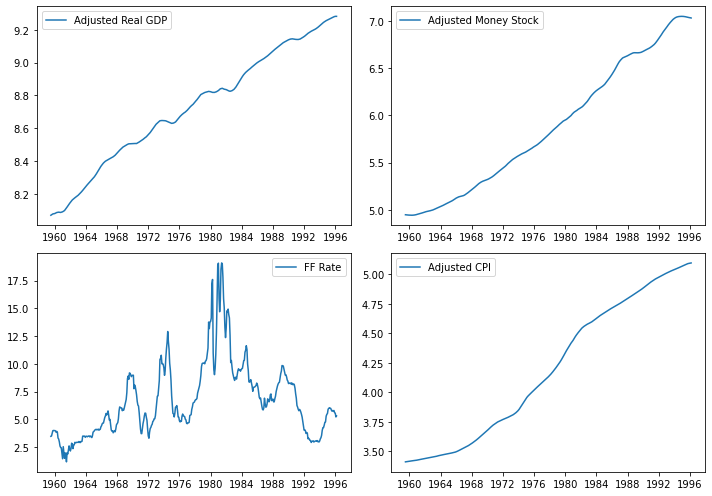

In [22]:
# plot original series and seasonally ajusted series

fig, ax = plt.subplots(2, 2, figsize=(10,7))

ax[0, 0].plot(data_mp['GDPC1_ADJ'].index, data_mp['GDPC1_ADJ'], label='Adjusted Real GDP')
ax[0, 1].plot(data_mp['M1SL_ADJ'].index, data_mp['M1SL_ADJ'], label='Adjusted Money Stock')
ax[1, 0].plot(data_mp["FEDFUNDS"].index, data_mp["FEDFUNDS"], label='FF Rate')
ax[1, 1].plot(data_mp['CPILFESL_ADJ'].index, data_mp['CPILFESL_ADJ'], label='Adjusted CPI')

for e in itertools.product([0,1], [0,1]):
    ax[e[0], e[1]].legend()

fig.tight_layout()
plt.show()

In [23]:
from statsmodels.tsa.api import VAR


# (b)VAR Model

data_var = data_mp[['GDPC1_ADJ', 'M1SL_ADJ', 'FEDFUNDS', 'CPILFESL_ADJ']]
model = VAR(data_var)
result = model.fit(lag_len)

# grenger test
columns = ['GDPC1_ADJ', 'M1SL_ADJ', 'FEDFUNDS', 'CPILFESL_ADJ']

for c in columns:
    grenger_test = result.test_causality(caused=c, causing=columns, kind='f', signif=0.05)
    print(grenger_test.summary())

Granger causality F-test. H_0: ['GDPC1_ADJ', 'M1SL_ADJ', 'FEDFUNDS', 'CPILFESL_ADJ'] do not Granger-cause GDPC1_ADJ. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df    
------------------------------------------------
     7.125e+06          1.524   0.000 (24, 1640)
------------------------------------------------
Granger causality F-test. H_0: ['GDPC1_ADJ', 'M1SL_ADJ', 'FEDFUNDS', 'CPILFESL_ADJ'] do not Granger-cause M1SL_ADJ. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df    
------------------------------------------------
     4.172e+07          1.524   0.000 (24, 1640)
------------------------------------------------
Granger causality F-test. H_0: ['GDPC1_ADJ', 'M1SL_ADJ', 'FEDFUNDS', 'CPILFESL_ADJ'] do not Granger-cause FEDFUNDS. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df    
------------------------------------------------
         687.8

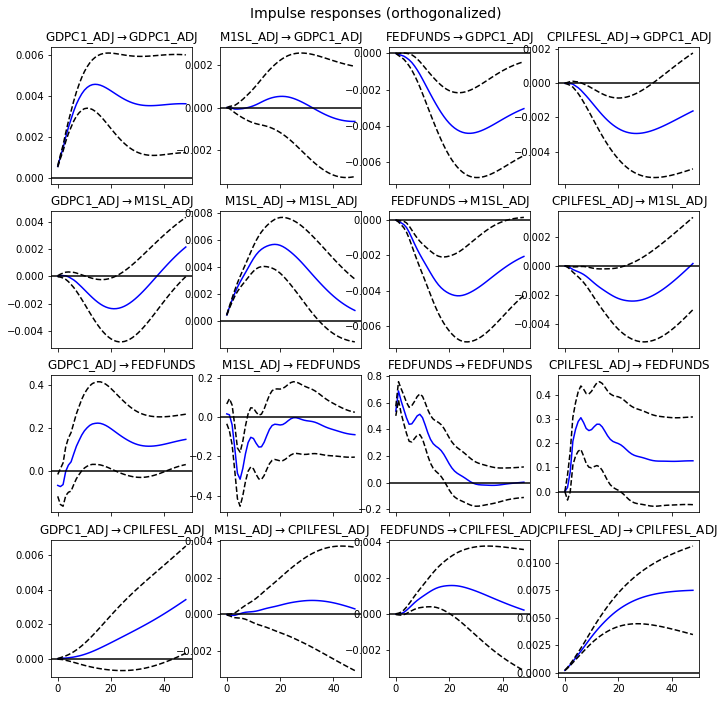

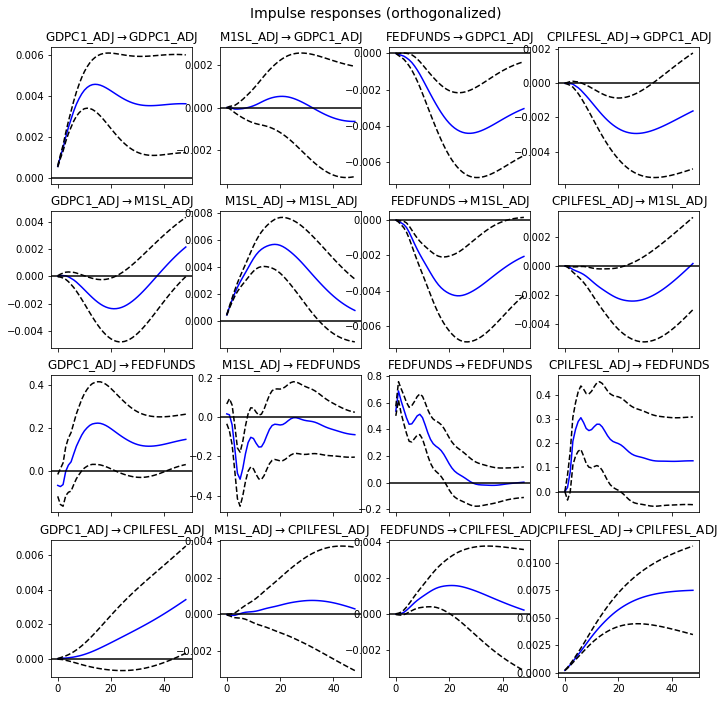

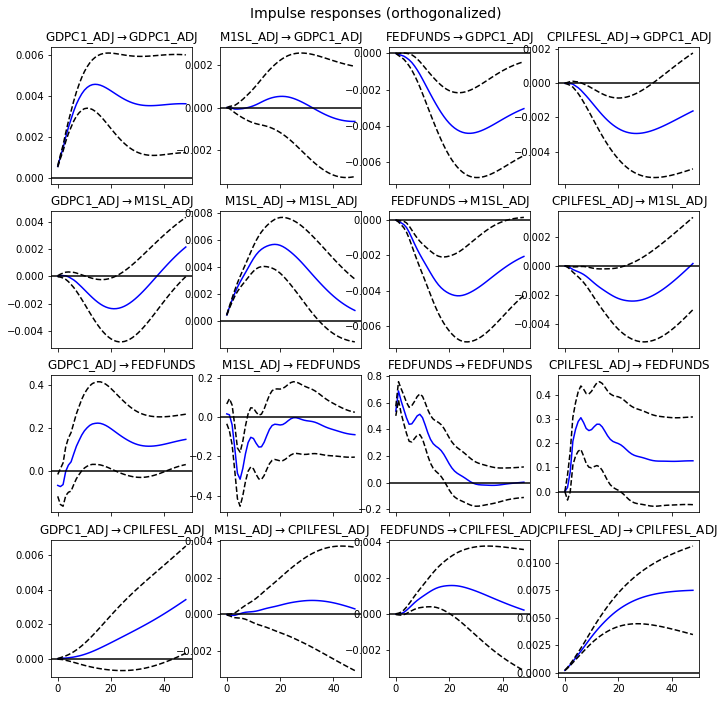

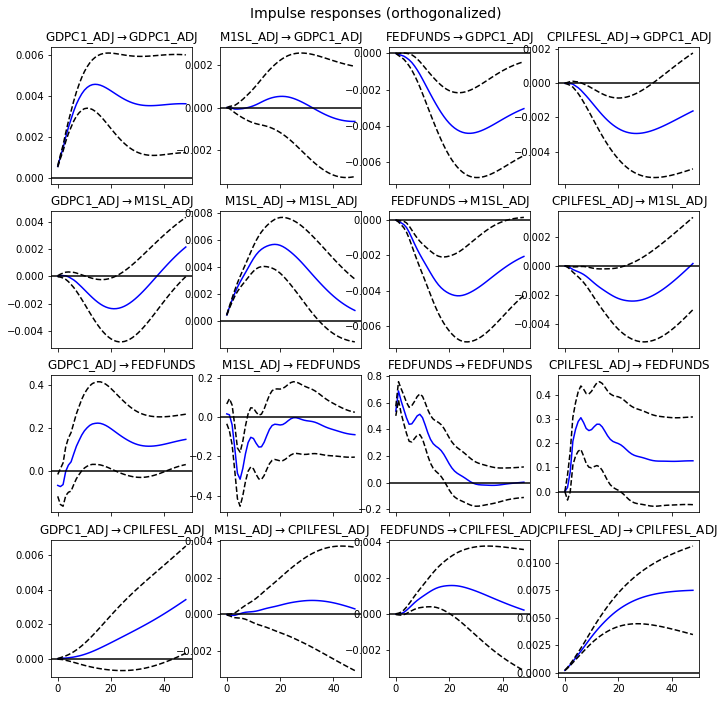

In [24]:
# (c)Impulse Response
irf = result.irf(periods=48)
irf.plot(orth=True,signif=0.05)

In [25]:
# coefficient matrix of structural shock
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 08, May, 2021
Time:                     23:19:36
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -47.3789
Nobs:                     435.000    HQIC:                  -47.9460
Log likelihood:           8139.73    FPE:                1.03979e-21
AIC:                     -48.3158    Det(Omega_mle):     8.31517e-22
--------------------------------------------------------------------
Results for equation GDPC1_ADJ
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.002852         0.004376           -0.652           0.515
L1.GDPC1_ADJ            1.860284         0.049525           37.563           0.000
L1.M1SL_ADJ             0.004899         0.05859

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 08, May, 2021
Time:                     23:19:36
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -47.3789
Nobs:                     435.000    HQIC:                  -47.9460
Log likelihood:           8139.73    FPE:                1.03979e-21
AIC:                     -48.3158    Det(Omega_mle):     8.31517e-22
--------------------------------------------------------------------
Results for equation GDPC1_ADJ
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.002852         0.004376           -0.652           0.515
L1.GDPC1_ADJ            1.860284         0.049525           37.563           0.000
L1.M1SL_ADJ             0.004899         0.05859

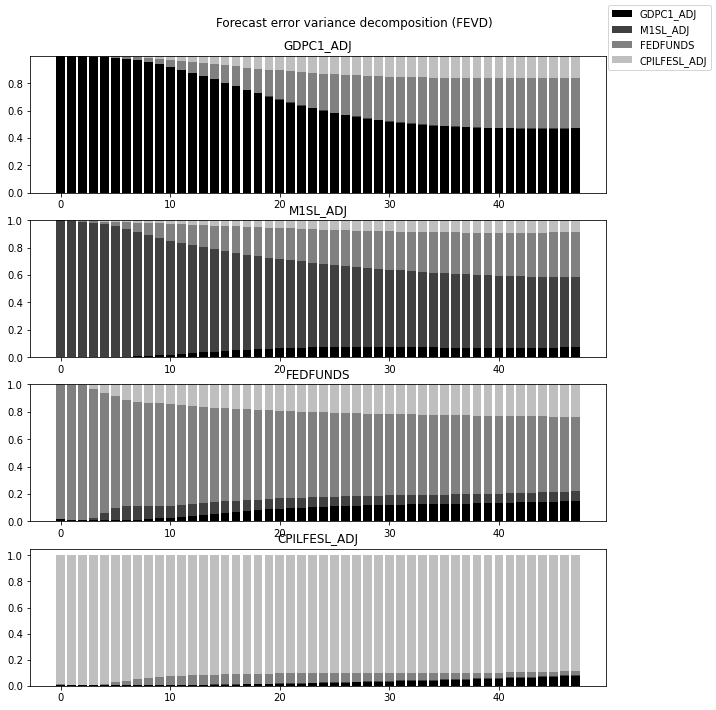

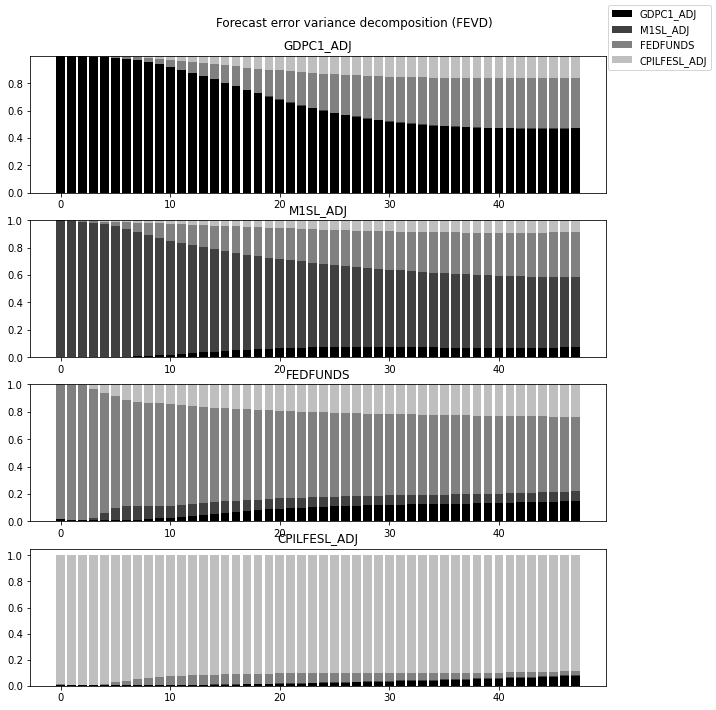

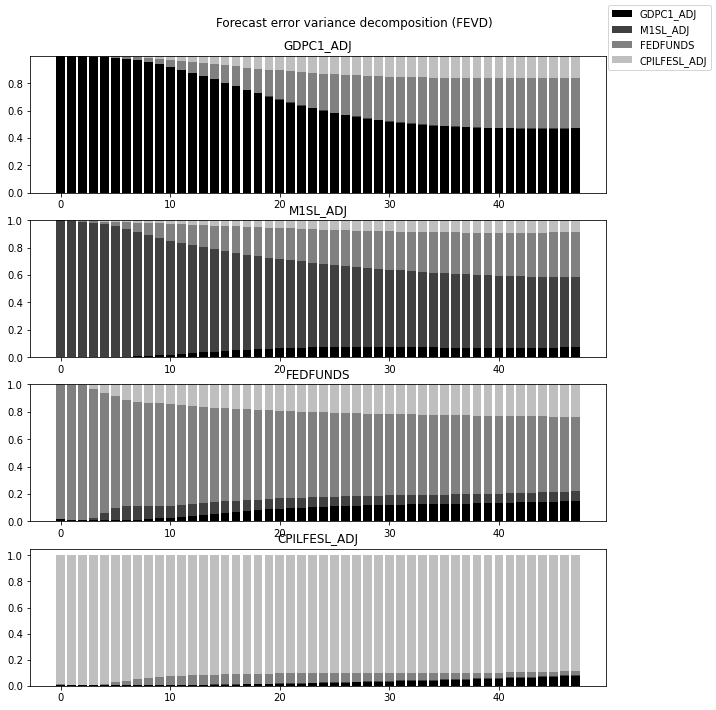

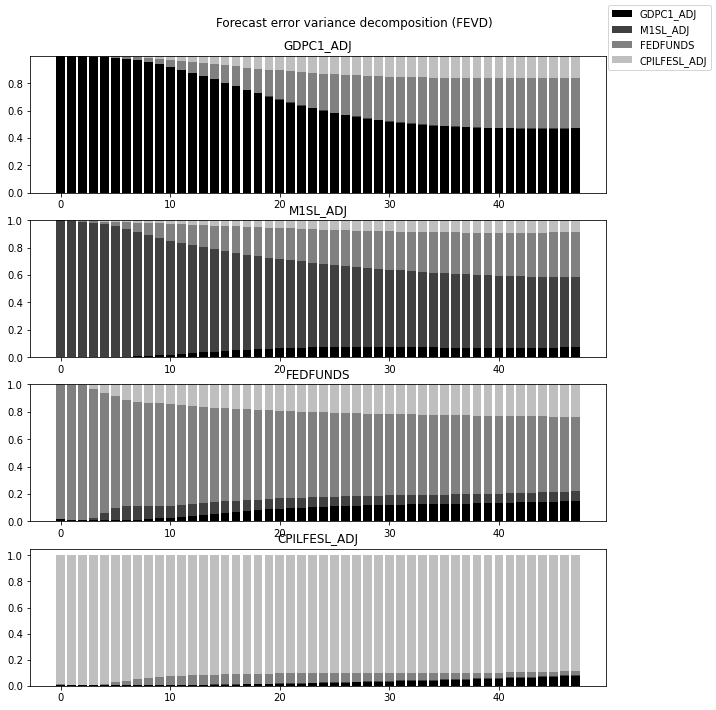

In [26]:
# (d) varience decompotision
fevd = result.fevd(48)
fevd.plot()